# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/pakhir/indonesian_movies.csv')
df

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97 min
1268,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116 min
1269,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150 min
1270,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",NaN


# Data Preparation

In [5]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB
None


##### Kolom yang akan digunakan yaitu : year , genre , user_rating

In [6]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

rating          896
description     432
runtime         403
genre            36
directors         7
title             0
year              0
users_rating      0
votes             0
languages         0
actors            0
dtype: int64


In [7]:
df = df.copy(deep=True)

In [8]:
df = df.dropna(axis='rows')
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [9]:
print(df.isnull().sum().sort_values(ascending=False))

title           0
year            0
description     0
genre           0
rating          0
users_rating    0
votes           0
languages       0
directors       0
actors          0
runtime         0
dtype: int64


dalam hal ini row yang terdapat missing value sudah tidak ada

# Dalam informasi dataset di atas bahwa genre bertype object dan user_rating bertype float
Metode apriori dalam market basket analysis nantinya akan error, maka kita akan ubah dengan type string dan type integer

In [10]:
df['users_rating'] = df['users_rating'].astype(int)

In [11]:
df['genre'] = df['genre'].astype(str)

In [12]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 1222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         286 non-null    object
 1   year          286 non-null    int64 
 2   description   286 non-null    object
 3   genre         286 non-null    object
 4   rating        286 non-null    object
 5   users_rating  286 non-null    int64 
 6   votes         286 non-null    object
 7   languages     286 non-null    object
 8   directors     286 non-null    object
 9   actors        286 non-null    object
 10  runtime       286 non-null    object
dtypes: int64(2), object(9)
memory usage: 26.8+ KB
None


## Jika semua sudah aman kita akan drop column yang tidak diperlukan

In [13]:
columns = ['title','description','rating','votes','languages','directors','actors','runtime']
df.drop(columns, inplace=True, axis=1)

In [14]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 1222
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          286 non-null    int64 
 1   genre         286 non-null    object
 2   users_rating  286 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.9+ KB
None


# Visualisasi dan Memahami data

In [15]:
most_rate = df['genre'].value_counts().head(20)

print('Biggest Rate Genre film: \n')
print(most_rate)

Biggest Rate Genre film: 

Drama        96
Horror       68
Comedy       56
Action       33
Adventure    18
Biography     8
Crime         3
Thriller      1
Animation     1
History       1
Romance       1
Name: genre, dtype: int64


In [16]:
#presentase dari rating tiap genre
rating_count = df.groupby(by='genre')[['users_rating']].count().sort_values(by='users_rating', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

rating_percentage = rating_count.apply(convert_to_percentage)
rating_percentage.head()

,users_rating
genre,
Drama,33.566434
Horror,23.776224
Comedy,19.580420
Action,11.538462
Adventure,6.293706


Text(0.5, 1.0, 'Items Most Rate')

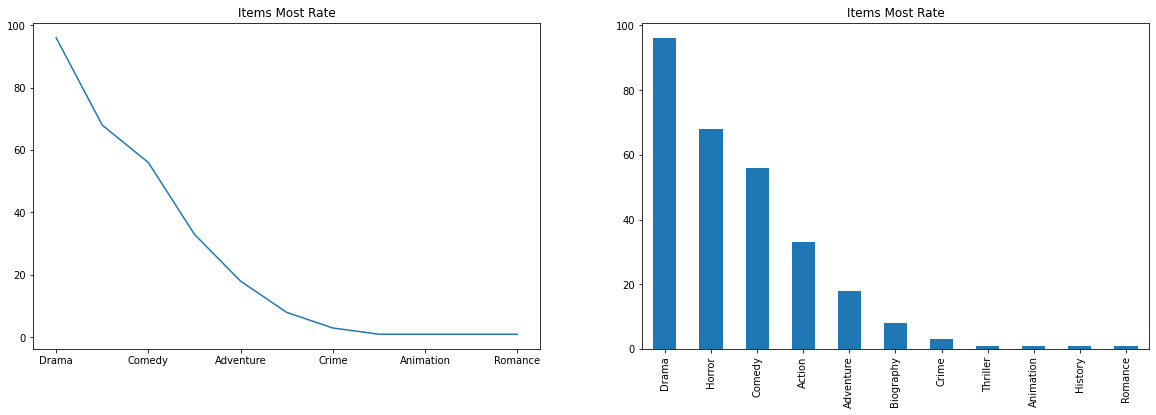

In [17]:
# visualisasikan data rating terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_rate)
most_rate.plot(kind='line')
plt.title('Items Most Rate')

plt.subplot(1,2,2)
most_rate.plot(kind='bar')
plt.title('Items Most Rate')

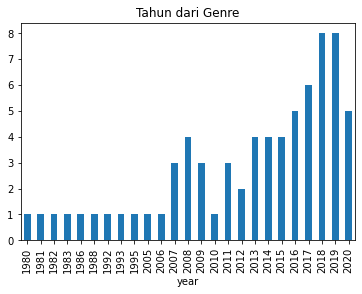

In [18]:
df.groupby('year')['users_rating'].nunique().plot(kind='bar', title='Tahun dari Genre')
plt.show()

In [19]:
print(df.groupby('year')['users_rating'].nunique())

year
1980    1
1981    1
1982    1
1983    1
1986    1
1988    1
1992    1
1993    1
1995    1
2005    1
2006    1
2007    3
2008    4
2009    3
2010    1
2011    3
2012    2
2013    4
2014    4
2015    4
2016    5
2017    6
2018    8
2019    8
2020    5
Name: users_rating, dtype: int64


In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [21]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['users_rating'].unique():
    tlist = list(set(df[df['users_rating']==i]['genre']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9


In [22]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [23]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
29462,"(Romance, Horror, Adventure)","(Comedy, Drama, History, Crime)",0.111111,1.000000,9.0
8566,"(Biography, Comedy, History)","(Romance, Adventure)",0.111111,1.000000,9.0
30230,"(Comedy, Drama, Thriller)","(Biography, Adventure, Action, Crime, Animation)",0.111111,1.000000,9.0
8569,"(Comedy, History, Adventure)","(Biography, Romance)",0.111111,1.000000,9.0
8570,"(Comedy, Romance, Adventure)","(Biography, History)",0.111111,1.000000,9.0
...,...,...,...,...,...
1586,(Horror),"(Biography, Comedy, Action)",0.222222,0.333333,1.0
1701,"(Biography, Drama, Action)",(Horror),0.222222,0.666667,1.0
6517,(Horror),"(Biography, Comedy, Drama, Action)",0.222222,0.333333,1.0
50,(Biography),(Horror),0.222222,0.666667,1.0
